<a href="https://colab.research.google.com/github/JazminaNurinNatasya/Kijang-Emas/blob/main/LSTM_Kijang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error


Load and Preprocess Data

In [ ]:
# Install the necessary modules
!pip install ipywidgets

# Import the necessary modules
import io
import pandas as pd
from ipywidgets import FileUpload

# Create a file upload widget
uploader = FileUpload()
uploader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 15.3 MB/s eta 0:00:00


FileUpload(value={}, description='Upload')

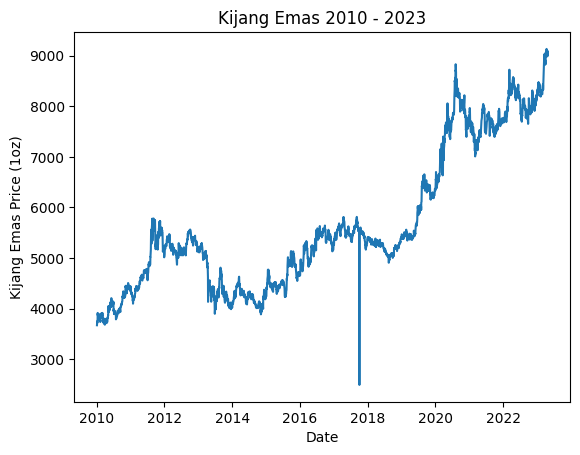

In [ ]:
# Load the dataset
data = pd.read_csv(io.BytesIO(uploader.data[0]))

# Convert Date to datetime and set as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Optionally, plot the gold prices
plt.plot(data['oz'])
plt.title('Kijang Emas 2010 - 2023')
plt.xlabel('Date')
plt.ylabel('Kijang Emas Price (1oz)')
plt.show()

In [ ]:
# Scale the price data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['oz'].values.reshape(-1, 1))

In [ ]:
import pandas as pd
import numpy as np

# Set a random seed for reproducibility
np.random.seed(100)

# Determine the split index (70% for training)
split_index = np.random.choice(data.index, size=int(len(data) * 0.80), replace=False)

# Training set (randomly selected rows)
gold_train = data.loc[split_index]

# Testing set (remaining rows)
gold_test = data.drop(split_index)

# Get the size (number of rows) of the training set
train_size = len(gold_train)

# Split the scaled data into training and testing sets
# Use train_size for slicing instead of gold_train
gold_train_scaled, gold_test_scaled = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Use train_size for slicing instead of gold_train
gold_train, gold_test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Output the number of rows in train and test sets
print(f"Train Data Length: {len(gold_train)}")
print(f"Test Data Length: {len(gold_test)}")

Train Data Length: 2590
Test Data Length: 648


In [ ]:
def create_sequences(dataset, look_back=60):
    X, y = [], []
    for i in range(look_back, len(dataset)):
        X.append(dataset[i-look_back:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

look_back = 60  # This defines how many previous days we use to predict the next
X_train1, y_train1 = create_sequences(gold_train, look_back)
X_test1, y_test1 = create_sequences(gold_test, look_back)

# Reshape X_train and X_test to be 3D (samples, timesteps, features)
X_train1 = np.reshape(X_train1, (X_train1.shape[0], X_train1.shape[1], 1))
X_test1 = np.reshape(X_test1, (X_test1.shape[0], X_test1.shape[1], 1))


In [ ]:
# Build LSTM model
model1 = Sequential()

# LSTM layers with dropout
model1.add(LSTM(units=50, return_sequences=True, input_shape=(X_train1.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50, return_sequences=False))
model1.add(Dropout(0.2))

# Dense layer for output
model1.add(Dense(units=1))

# Compile the model
model1.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model1.fit(X_train1, y_train1, epochs=20, batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - loss: 0.0328
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 118ms/step - loss: 0.0021
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0019
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.0015
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0015
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0014
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0013
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - loss: 0.0015
Epoch 9/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.0022
Epoch 10/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0013
Epoch 11/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.0012
Epoch 12/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0012
Epoch 13/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0011
Epoch 14/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.0011
Epoch 15/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - loss: 0.0010
Epoch 16/20
80

In [ ]:
# Import the necessary modules
!pip install matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make predictions on the test data
predictions1 = model1.predict(X_test1)

# Inverse scale the predictions and the y_test values to get actual prices
predictions1 = scaler.inverse_transform(predictions1)
y_test_actual1 = scaler.inverse_transform(y_test1.reshape(-1, 1))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step


Root Mean Squared Error: 139.74664969375024
Mean Square Error: 19529.126100627745
MAPE: 0.013862178726986174
AIC: 67111.24141849847
BIC: 201262.29909853925
         lb_stat  lb_pvalue
36  11803.483015        0.0


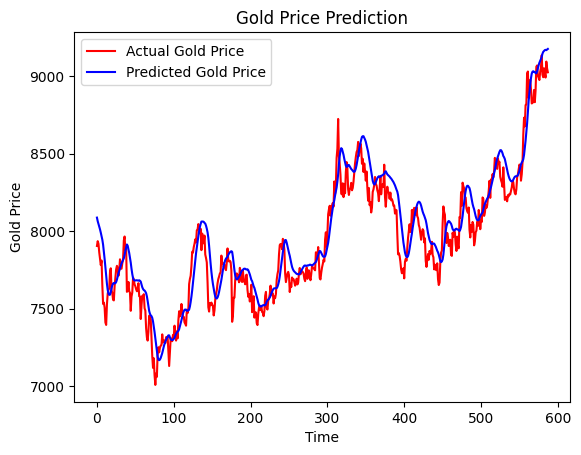

In [ ]:
# Calculate Error for performance evaluation
rmse = np.sqrt(mean_squared_error(y_test_actual1, predictions1))
mse = mean_squared_error(y_test_actual1, predictions1)
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test_actual1, predictions1)

#print
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Square Error: {mse}")
print(f"MAPE: {mape}")

# AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion) for LSTM
def calculate_aic_bic(n, mse, k):
    # n: number of observations
    # mse: mean squared error
    # k: number of model parameters (weights)

    aic = n * np.log(mse) + 2 * k
    bic = n * np.log(mse) + k * np.log(n)

    return aic, bic

# Calculate AIC and BIC
n = len(y_test1)  # number of observations
k = model1.count_params()  # number of parameters in the LSTM model
aic, bic = calculate_aic_bic(n, mse, k)

# Print AIC and BIC
print(f"AIC: {aic}")
print(f"BIC: {bic}")

# Ljung-Box Test for residuals
# First, we need to compute the residuals (actual - predicted)
residuals1 = y_test1.flatten() - predictions1.flatten()

# Import the necessary function for Ljung-Box test
from statsmodels.stats.diagnostic import acorr_ljungbox
# Perform the Ljung-Box test (null hypothesis: no autocorrelation in residuals)
ljung_box_result = acorr_ljungbox(residuals1, lags=[36], return_df=True)

# Print Ljung-Box test result
print(ljung_box_result)

# Plot predictions vs actual prices
plt.plot(y_test_actual1, color='red', label='Actual Gold Price')
plt.plot(predictions1, color='blue', label='Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Make predictions on the test set
predicted_prices1 = model1.predict(X_test1)

# Inverse transform the predictions and actual test values to get the original prices
predicted_prices1 = scaler.inverse_transform(predicted_prices1)
actual_prices1 = scaler.inverse_transform(y_test1.reshape(-1, 1))

# Create a DataFrame to compare actual and predicted prices
comparison_df = pd.DataFrame({
    'Date': data.index[train_size + look_back:],  # Align dates to test set
    'Actual Price': actual_prices1.flatten(),  # Flatten to get a 1D array
    'Predicted Price': predicted_prices1.flatten()  # Flatten to get a 1D array
})

# Display the comparison table (first 10 rows)
print(comparison_df.head(10))

print(comparison_df.tail(10))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
        Date  Actual Price  Predicted Price
0 2020-11-13        7904.0      8086.838867
1 2020-11-16        7935.0      8063.448730
2 2020-11-17        7918.0      8044.583496
3 2020-11-18        7862.0      8028.375488
4 2020-11-19        7819.0      8010.557129
5 2020-11-20        7781.0      7989.848633
6 2020-11-23        7810.0      7965.948242
7 2020-11-24        7651.0      7944.362305
8 2020-11-25        7530.0      7912.547852
9 2020-11-26        7539.0      7867.744141
          Date  Actual Price  Predicted Price
578 2023-04-13        9053.0      9109.540039
579 2023-04-14        9134.0      9123.434570
580 2023-04-17        9008.0      9144.034180
581 2023-04-18        8992.0      9155.810547
582 2023-04-19        9050.0      9160.936523
583 2023-04-20        9017.0      9166.576172
584 2023-04-25        8990.0      9168.771484
585 2023-04-26        9093.0      9166.643555
586 2023-04-27        9049.0      9171.055664
587 2023-04-28  